we make this model to analyse the olympics games data and to pridict outcome using regression techniques

In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('athlete_events.csv') 
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# extract sports data for males and height, weight statistics
base_data_male = df.loc[df['Sex'] == "M",
                                              ['Sport', 'Age','Weight', 'Height']].drop_duplicates()

In [8]:
base_data_male.head(10)

,Sport,Age,Weight,Height
0,Basketball,24.0,80.0,180.0
1,Judo,23.0,60.0,170.0
2,Football,24.0,NaN,NaN
3,Tug-Of-War,34.0,NaN,NaN
10,Cross Country Skiing,31.0,75.0,188.0
14,Cross Country Skiing,33.0,75.0,188.0
18,Cross Country Skiing,31.0,72.0,183.0
22,Cross Country Skiing,33.0,72.0,183.0
28,Ice Hockey,26.0,96.0,186.0
29,Swimming,26.0,NaN,NaN


In [11]:
Y, X = dmatrices('Sport ~ 0 + Weight + Height',
                data = base_data_male,
                return_type = 'dataframe')

we wanted to pridict outcome based on athletes weight and height that is the reason we choose weightlifting

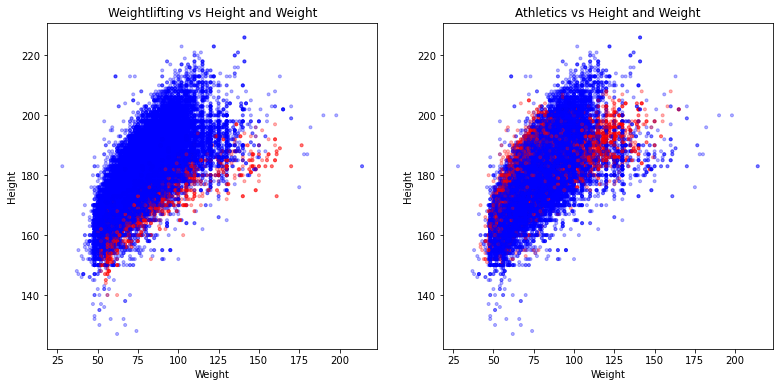

In [12]:
fig, (ax1, ax2) = subplots(nrows = 1, ncols = 2, figsize = (13,6))

ax1.scatter(X['Weight'], X['Height'], c = Y['Sport[Weightlifting]'], cmap = 'bwr', marker = '.', alpha = 0.3)
ax1.set_title('Weightlifting vs Height and Weight')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Height')

ax2.scatter(X['Weight'], X['Height'], c = Y['Sport[Athletics]'], cmap = 'bwr', marker = '.', alpha = 0.3)
ax2.set_title('Athletics vs Height and Weight')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Height')

show()

In [13]:
base_data_male['target'] = np.where(base_data_male['Sport'] == 'Weightlifting', 1, 0)

In [14]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors

Y, X = dmatrices('target ~ 0 + Weight + Height',
                data = base_data_male,
                return_type = 'dataframe')

y = Y['target'].values

accuracies = []

kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True).split(X, y)

model = neighbors.KNeighborsClassifier(n_neighbors = 20,
                                      p = 2,
                                      weights = 'uniform')

for train, holdout in kfold:
    model.fit(X.iloc[train], y[train])
    prediction_on_test = model.predict(X.iloc[holdout])
    accuracies.append(metrics.accuracy_score(y[holdout], prediction_on_test))

np.mean(accuracies)

0.9730734885881883

our model have accuracy of 97%